In [210]:
import yfinance as yf
import pandas as pd

### Indexes

In [211]:
# Define the ticker symbol for Nasdaq (NQ)
ticker = "^GDAXI"  # ^IXIC is the Nasdaq Composite Index

# Create a Yahoo Finance object
nq = yf.Ticker(ticker)

# Download historical data from 1980 until now
data = nq.history(period="max")

# Print the first few rows of the data
print(data.head())


                                  Open         High          Low        Close  \
Date                                                                            
1987-12-30 00:00:00+01:00  1005.190002  1005.190002  1005.190002  1005.190002   
1988-01-04 00:00:00+01:00   956.489990   956.489990   956.489990   956.489990   
1988-01-05 00:00:00+01:00   996.099976   996.099976   996.099976   996.099976   
1988-01-06 00:00:00+01:00  1006.010010  1006.010010  1006.010010  1006.010010   
1988-01-07 00:00:00+01:00  1014.469971  1014.469971  1014.469971  1014.469971   

                           Volume  Dividends  Stock Splits  
Date                                                        
1987-12-30 00:00:00+01:00       0        0.0           0.0  
1988-01-04 00:00:00+01:00       0        0.0           0.0  
1988-01-05 00:00:00+01:00       0        0.0           0.0  
1988-01-06 00:00:00+01:00       0        0.0           0.0  
1988-01-07 00:00:00+01:00       0        0.0           0.0  


<Axes: title={'center': 'DAX Index'}, xlabel='Date'>

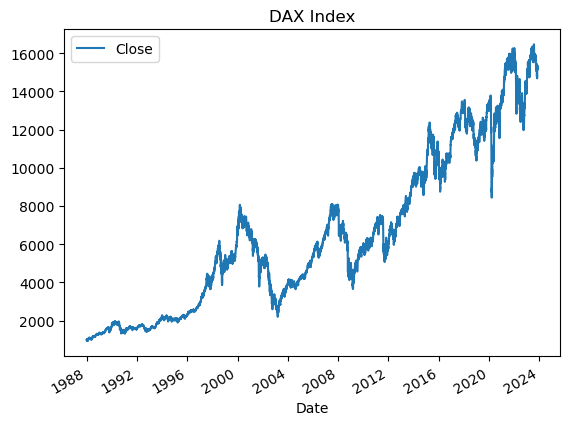

In [212]:
data.plot(y="Close", title="DAX Index")

In [213]:
futures_data = yf.download(["^FCHI","^GDAXI","^IXIC", "^GSPC"], start="1950-01-01", end="2021-12-31", group_by= 'tickers')


[*********************100%%**********************]  4 of 4 completed


<Axes: xlabel='Date'>

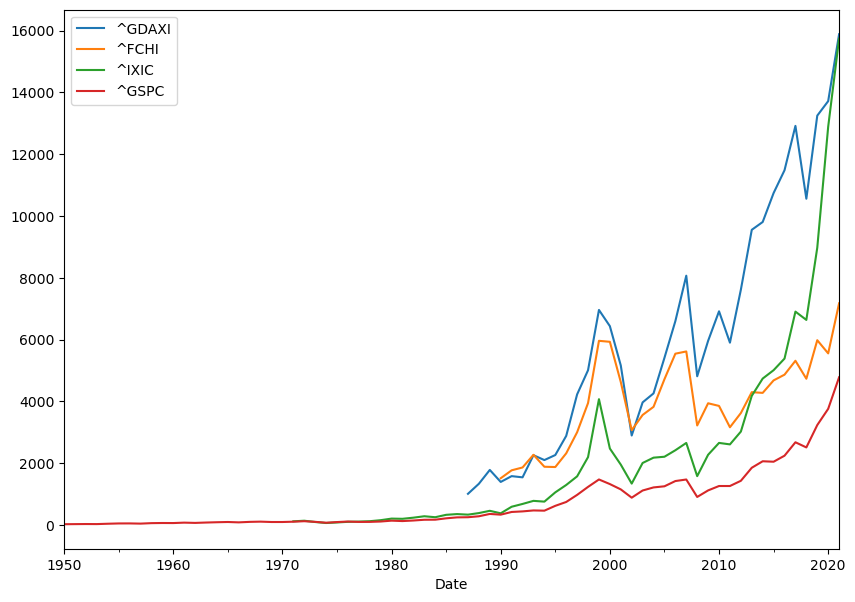

In [214]:
futures_data.xs('Close', level=1, axis=1).groupby(pd.Grouper(freq='Y')).last().plot(figsize=(10, 7))

### GDP

In [215]:
gdp = pd.read_csv("API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5994720.csv", skiprows=4, index_col=0)

gdp.head()

,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26942.307976,28421.386493,28451.273745,29326.708058,30918.515218,31902.762582,24487.863569,29342.100730,NaN,NaN
Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,161.638982,161.111657,170.538537,198.038919,178.019217,196.818756,207.945574,...,1724.534381,1545.559084,1436.094404,1613.668488,1550.111762,1499.954437,1353.927527,1539.165543,1622.391720,NaN
Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,62.369375,62.443703,60.950364,82.021738,85.511073,105.243196,143.103233,...,628.146804,592.476165,520.251955,530.149863,502.057099,500.522981,516.866797,363.674087,NaN,NaN
Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.423775,112.503866,118.197351,122.774120,131.163760,137.809818,143.601581,...,2247.857492,1880.750778,1646.972399,1588.581005,1732.816544,1810.538006,1686.997899,1765.965307,1790.348800,NaN
Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5059.080441,3100.830685,1709.515534,2283.214233,2487.500996,2142.238757,1502.950754,1903.717405,2998.501158,NaN


In [216]:
gdp = gdp[[col for col in gdp.columns if col.isdigit()]].copy(deep=True).T

gdp.head()

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,161.638982,62.369375,107.423775,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,456.826375,NaN,NaN,NaN,529.561923,228.567399,276.643363
1961,NaN,161.111657,62.443703,112.503866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,471.686740,NaN,NaN,NaN,543.042224,216.274674,279.332656
1962,NaN,170.538537,60.950364,118.197351,NaN,NaN,NaN,NaN,NaN,1163.186836,...,NaN,NaN,NaN,495.967407,NaN,NaN,NaN,560.699395,208.562685,275.966139
1963,NaN,198.038919,82.021738,122.774120,NaN,NaN,NaN,NaN,NaN,855.275656,...,NaN,NaN,NaN,523.401899,NaN,NaN,NaN,601.599951,209.453362,277.532515
1964,NaN,178.019217,85.511073,131.163760,NaN,NaN,NaN,NaN,NaN,1179.504098,...,NaN,NaN,NaN,561.424407,NaN,NaN,NaN,642.688431,236.941713,282.376856


<Axes: >

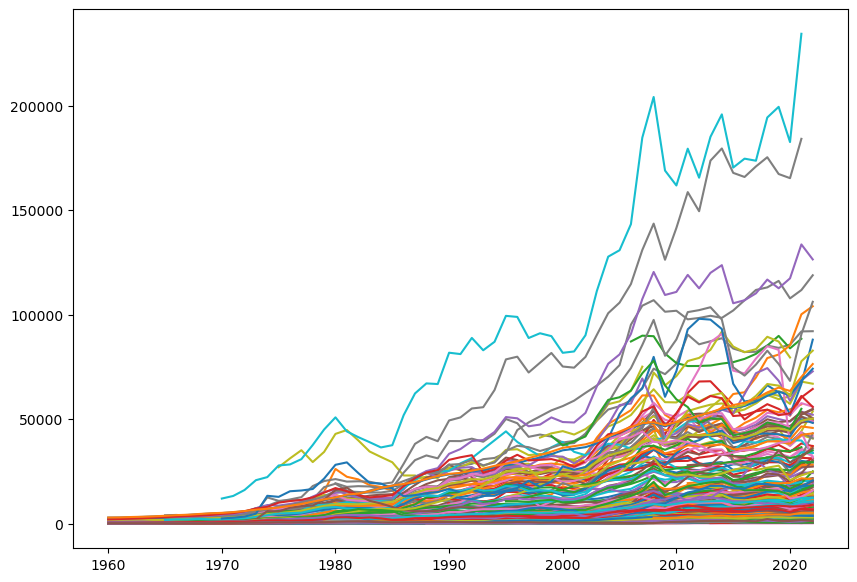

In [217]:
gdp.plot(figsize=(10, 7), legend=False)

### Merge example

In [218]:
display(futures_data.head())
display(gdp.head())

^GDAXI                                 ^FCHI                 ...  \
             Open High Low Close Adj Close Volume  Open High Low Close  ...   
Date                                                                    ...   
1950-01-03    NaN  NaN NaN   NaN       NaN    NaN   NaN  NaN NaN   NaN  ...   
1950-01-04    NaN  NaN NaN   NaN       NaN    NaN   NaN  NaN NaN   NaN  ...   
1950-01-05    NaN  NaN NaN   NaN       NaN    NaN   NaN  NaN NaN   NaN  ...   
1950-01-06    NaN  NaN NaN   NaN       NaN    NaN   NaN  NaN NaN   NaN  ...   
1950-01-09    NaN  NaN NaN   NaN       NaN    NaN   NaN  NaN NaN   NaN  ...   

           ^IXIC                         ^GSPC                                 \
             Low Close Adj Close Volume   Open   High    Low  Close Adj Close   
Date                                                                            
1950-01-03   NaN   NaN       NaN    NaN  16.66  16.66  16.66  16.66     16.66   
1950-01-04   NaN   NaN       NaN    NaN  16.85  16.85  16.85  16.85     16.85   
1950-01-05   NaN   NaN       NaN    NaN  16.93  16.93  16.93  16.93     16.93   
1950-01-06   NaN   NaN       NaN    NaN  16.98  16.98  16.98  16.98     16.98   
1950-01-09   NaN   NaN       NaN    NaN  17.08  17.08  17.08  17.08     17.08   

                       
               Volume  
Date                   
1950-01-03  1260000.0  
1950-01-04  1890000.0  
1950-01-05  2550000.0  
1950-01-06  2010000.0  
1950-01-09  2520000.0  

[5 rows x 24 columns]

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,NaN,161.638982,62.369375,107.423775,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,456.826375,NaN,NaN,NaN,529.561923,228.567399,276.643363
1961,NaN,161.111657,62.443703,112.503866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,471.686740,NaN,NaN,NaN,543.042224,216.274674,279.332656
1962,NaN,170.538537,60.950364,118.197351,NaN,NaN,NaN,NaN,NaN,1163.186836,...,NaN,NaN,NaN,495.967407,NaN,NaN,NaN,560.699395,208.562685,275.966139
1963,NaN,198.038919,82.021738,122.774120,NaN,NaN,NaN,NaN,NaN,855.275656,...,NaN,NaN,NaN,523.401899,NaN,NaN,NaN,601.599951,209.453362,277.532515
1964,NaN,178.019217,85.511073,131.163760,NaN,NaN,NaN,NaN,NaN,1179.504098,...,NaN,NaN,NaN,561.424407,NaN,NaN,NaN,642.688431,236.941713,282.376856


In [219]:
columns_movies = [
    "wikipedia_movie_ID",
    "freebase_movie_ID",
    "movie_name",
    "movie_release_date",
    "movie_box_office_revenue",
    "movie_runtime",
    "movie_languages",
    "movie_countries",
    "movie_genres",
]

DATA_PATH = "/Users/mikolajboronski/Documents/EPFL/AppliedDataAnalysis/project1/MovieSummaries/"
MOVIE_PATH = DATA_PATH + "movie.metadata.tsv"

movies = pd.read_csv(MOVIE_PATH, sep="\t", names=columns_movies, header=None)
movies["year"] = movies["movie_release_date"].str[:4]

movies.head()

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983


,movie_box_office_revenue
year,
1010,1.216098e+07
1897,1.000000e+05
1914,2.831728e+06
1915,5.000000e+07
1920,4.500000e+06
...,...
2008,2.228189e+10
2009,2.481212e+10
2010,2.298734e+10


<Axes: xlabel='year'>

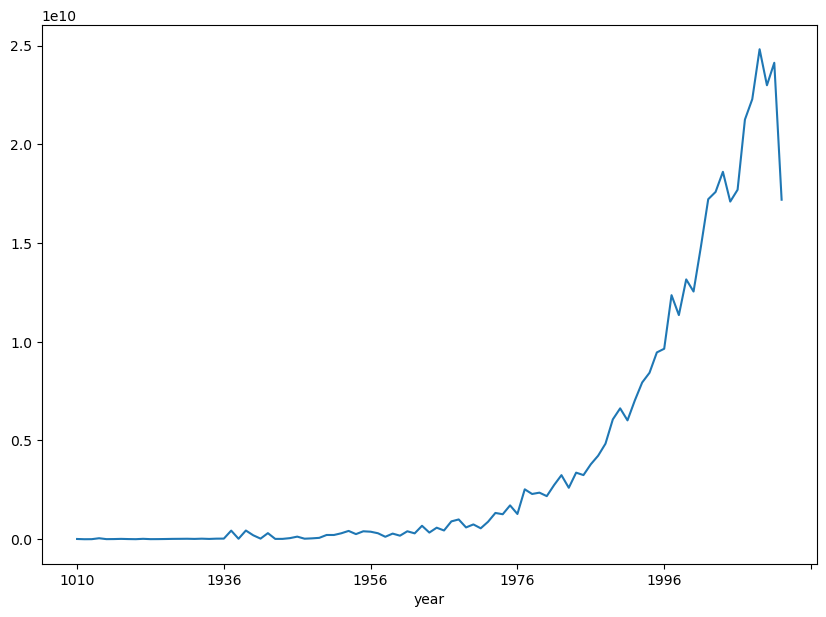

In [220]:
boxoffice_per_year = movies.dropna(subset=["movie_box_office_revenue"]).groupby("year")[["movie_box_office_revenue"]].sum()

display(boxoffice_per_year)
boxoffice_per_year.plot(figsize=(10, 7), legend=False)

In [221]:
boxoffice_per_year_filtered = boxoffice_per_year[boxoffice_per_year.index.astype(int) > 1900].copy(deep=True)
boxoffice_per_year_filtered.index = boxoffice_per_year_filtered.index.astype(int)

display(boxoffice_per_year_filtered)

,movie_box_office_revenue
year,
1914,2.831728e+06
1915,5.000000e+07
1920,4.500000e+06
1921,7.900000e+06
1922,1.753097e+07
...,...
2008,2.228189e+10
2009,2.481212e+10
2010,2.298734e+10


In [222]:
futures_close_per_year = futures_data.xs('Close', level=1, axis=1).groupby(pd.Grouper(freq='Y')).last()

futures_close_per_year.index = futures_close_per_year.index.year.rename("year")
futures_close_per_year.index = futures_close_per_year.index.astype(int)

display(futures_close_per_year)

,^GDAXI,^FCHI,^IXIC,^GSPC
year,,,,
1950,NaN,NaN,NaN,20.430000
1951,NaN,NaN,NaN,23.770000
1952,NaN,NaN,NaN,26.570000
1953,NaN,NaN,NaN,24.809999
1954,NaN,NaN,NaN,35.980000
...,...,...,...,...
2017,12917.639648,5312.560059,6903.390137,2673.610107
2018,10558.959961,4730.689941,6635.279785,2506.850098
2019,13249.009766,5978.060059,8972.599609,3230.780029


In [223]:
gdp.index = gdp.index.astype(int).rename("year")

display(gdp)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,161.638982,62.369375,107.423775,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,456.826375,NaN,NaN,NaN,529.561923,228.567399,276.643363
1961,NaN,161.111657,62.443703,112.503866,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,471.686740,NaN,NaN,NaN,543.042224,216.274674,279.332656
1962,NaN,170.538537,60.950364,118.197351,NaN,NaN,NaN,NaN,NaN,1163.186836,...,NaN,NaN,NaN,495.967407,NaN,NaN,NaN,560.699395,208.562685,275.966139
1963,NaN,198.038919,82.021738,122.774120,NaN,NaN,NaN,NaN,NaN,855.275656,...,NaN,NaN,NaN,523.401899,NaN,NaN,NaN,601.599951,209.453362,277.532515
1964,NaN,178.019217,85.511073,131.163760,NaN,NaN,NaN,NaN,NaN,1179.504098,...,NaN,NaN,NaN,561.424407,NaN,NaN,NaN,642.688431,236.941713,282.376856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,30918.515218,1550.111762,502.057099,1732.816544,2487.500996,5287.660817,42904.828456,6573.816970,46722.268719,11795.162885,...,36653.863048,3267.225009,3076.835315,11290.099975,4189.052219,4384.190404,701.714878,7048.508112,1475.199836,2269.177012
2019,31902.762582,1499.954437,500.522981,1810.538006,2142.238757,5396.214227,41328.600499,6498.529037,45376.170839,9963.674231,...,38596.030712,3491.091279,3076.589886,11330.453670,4308.301453,4416.031322,693.816484,6688.774746,1268.120941,1421.868596
2020,24487.863569,1353.927527,516.866797,1686.997899,1502.950754,5343.037704,37207.222000,5639.398735,37629.174168,8496.428157,...,39552.168595,3586.347297,2917.756849,10895.735233,4042.722715,4310.932984,583.875663,5741.641249,956.831747,1372.696674


In [224]:
boxoffice_per_year_filtered.index

Index([1914, 1915, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929,
       1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941,
       1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012],
      dtype='int64', name='year')

In [225]:
futures_close_per_year.index

Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype='int64', name='year')

In [226]:
boxoffice_futures = pd.merge(boxoffice_per_year_filtered, futures_close_per_year, left_index=True, right_index=True)
df = pd.merge(boxoffice_futures, gdp, left_index=True, right_index=True)

display(df)

,movie_box_office_revenue,^GDAXI,^FCHI,^IXIC,^GSPC,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960,1.789636e+08,NaN,NaN,NaN,58.110001,NaN,161.638982,62.369375,107.423775,NaN,...,NaN,NaN,NaN,456.826375,NaN,NaN,NaN,529.561923,228.567399,276.643363
1961,4.029080e+08,NaN,NaN,NaN,71.550003,NaN,161.111657,62.443703,112.503866,NaN,...,NaN,NaN,NaN,471.686740,NaN,NaN,NaN,543.042224,216.274674,279.332656
1962,2.972976e+08,NaN,NaN,NaN,63.099998,NaN,170.538537,60.950364,118.197351,NaN,...,NaN,NaN,NaN,495.967407,NaN,NaN,NaN,560.699395,208.562685,275.966139
1963,6.804930e+08,NaN,NaN,NaN,75.019997,NaN,198.038919,82.021738,122.774120,NaN,...,NaN,NaN,NaN,523.401899,NaN,NaN,NaN,601.599951,209.453362,277.532515
1964,3.367611e+08,NaN,NaN,NaN,84.750000,NaN,178.019217,85.511073,131.163760,NaN,...,NaN,NaN,NaN,561.424407,NaN,NaN,NaN,642.688431,236.941713,282.376856
1965,5.838362e+08,NaN,NaN,NaN,92.430000,NaN,196.818756,105.243196,137.809818,NaN,...,NaN,NaN,NaN,599.152118,NaN,NaN,NaN,681.131112,296.022427,294.893605
1966,4.432194e+08,NaN,NaN,NaN,80.330002,NaN,207.945574,143.103233,143.601581,NaN,...,NaN,NaN,NaN,636.789953,NaN,NaN,NaN,718.118179,334.672528,279.337779
1967,9.033379e+08,NaN,NaN,NaN,96.470001,NaN,210.149894,167.165675,128.049650,NaN,...,NaN,NaN,NaN,663.878549,NaN,NaN,NaN,775.152812,350.653425,295.056449
1968,1.001559e+09,NaN,NaN,NaN,103.860001,NaN,223.040659,134.012768,129.123648,NaN,...,NaN,NaN,NaN,701.852920,NaN,NaN,NaN,813.508497,398.557506,302.802871


<Axes: >

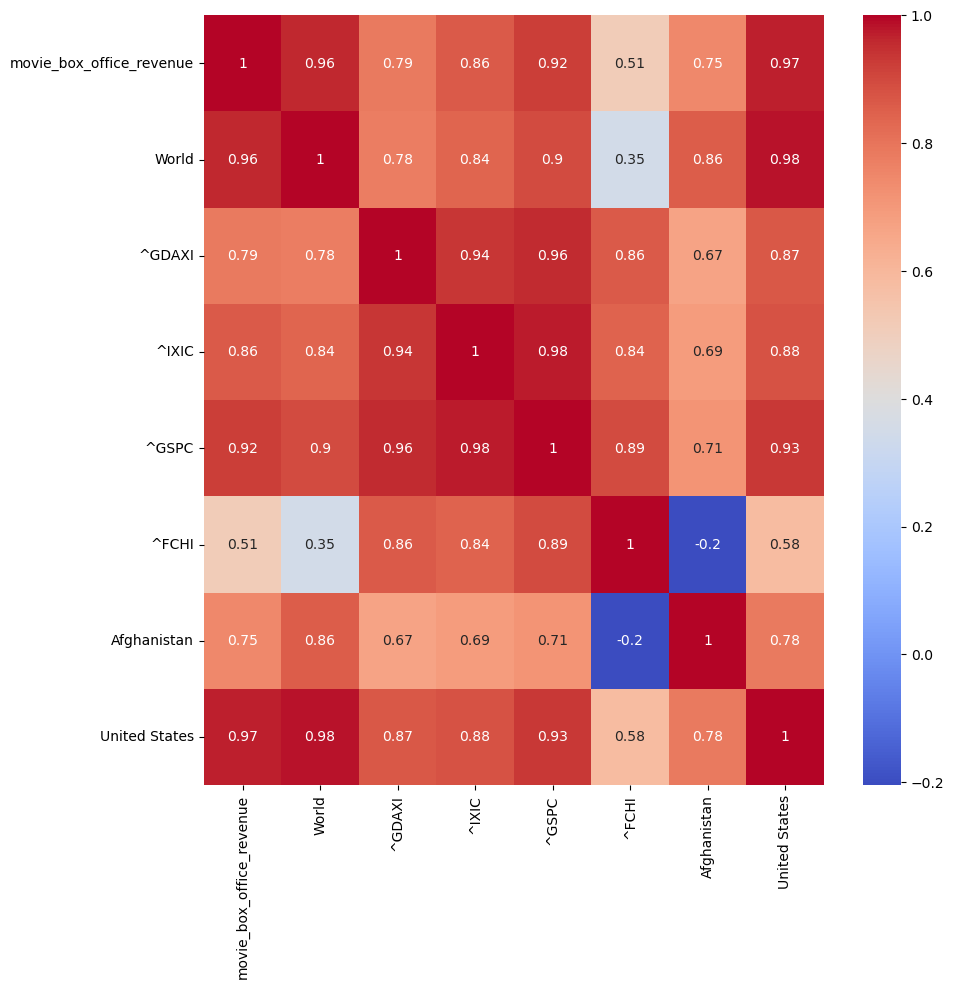

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

corrs = []
for col in ["World", "^GDAXI", "^IXIC", "^GSPC", "^FCHI", "Afghanistan"]:
    corrs.append((col, df["movie_box_office_revenue"].corr(df[col])))

plt.figure(figsize=(10, 10))
sns.heatmap(df[["movie_box_office_revenue", "World", "^GDAXI", "^IXIC", "^GSPC", "^FCHI", "Afghanistan", "United States"]].corr(), annot=True, cmap="coolwarm")

In [228]:
df.corr().iloc[0]

movie_box_office_revenue    1.000000
^GDAXI                      0.787501
^FCHI                       0.513501
^IXIC                       0.863127
^GSPC                       0.924121
                              ...   
Kosovo                     -0.403984
Yemen, Rep.                 0.846272
South Africa                0.904583
Zambia                      0.700439
Zimbabwe                    0.225374
Name: movie_box_office_revenue, Length: 271, dtype: float64

In [229]:
[col for col in gdp.columns if col.__contains__("United")]

['United Arab Emirates', 'United Kingdom', 'United States']

### Other

In [242]:
movies["country"] = movies["movie_countries"].apply(lambda x: x.split(":")[-1].strip("}").replace('"', ''))
movies["country"][movies["country"] == "{"] = "Unknown"

display(movies)

/var/folders/sv/w7ktc7zj5z599_rcq8wsnttw0000gn/T/ipykernel_70175/858034680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies["country"][movies["country"] == "{"] = "Unknown"


,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,country
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,United States of America
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,United States of America
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988,Norway
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987,United Kingdom
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983,Germany
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",2011,United States of America
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",2011,United Kingdom
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}",1972,United States of America
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...",1992,Japan


Text(0.5, 1.0, 'Number of movies per country')

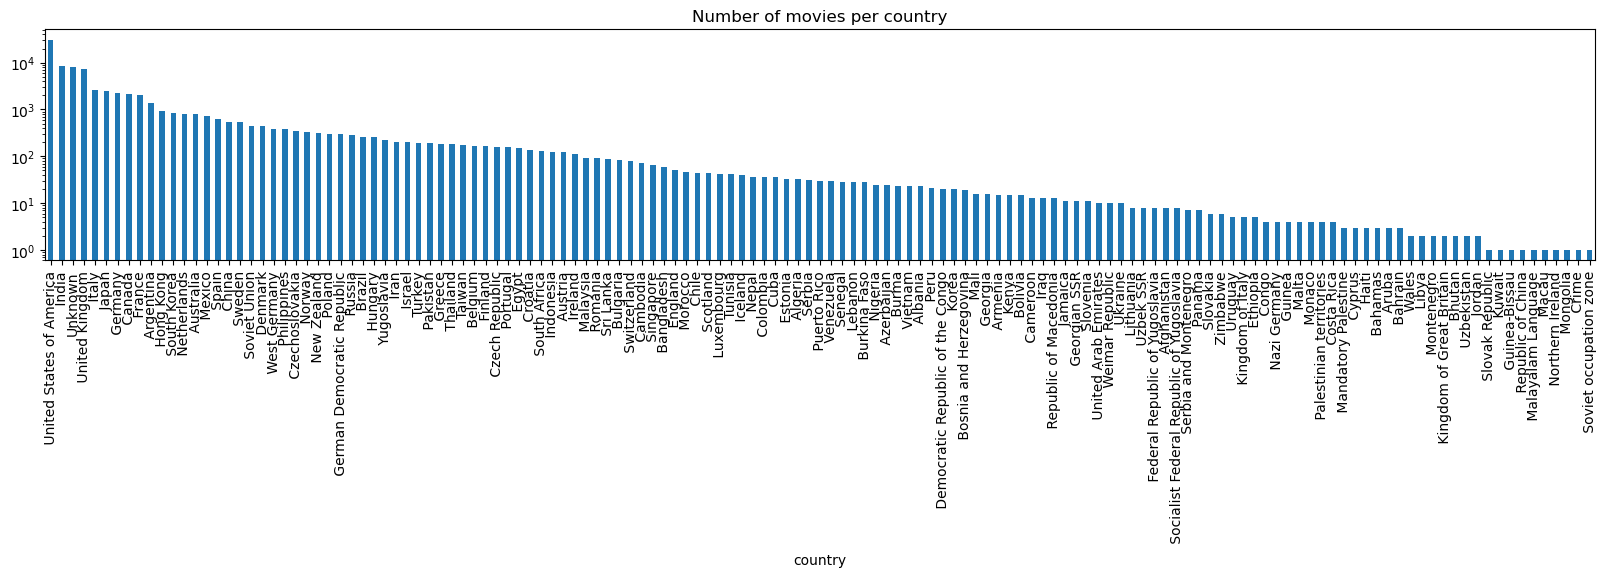

In [243]:
movies["country"].value_counts().plot(kind="bar", figsize=(20, 3), rot=90)
plt.yscale("log")
plt.title("Number of movies per country")

Text(0.5, 1.0, 'Number of movies with known box office per country')

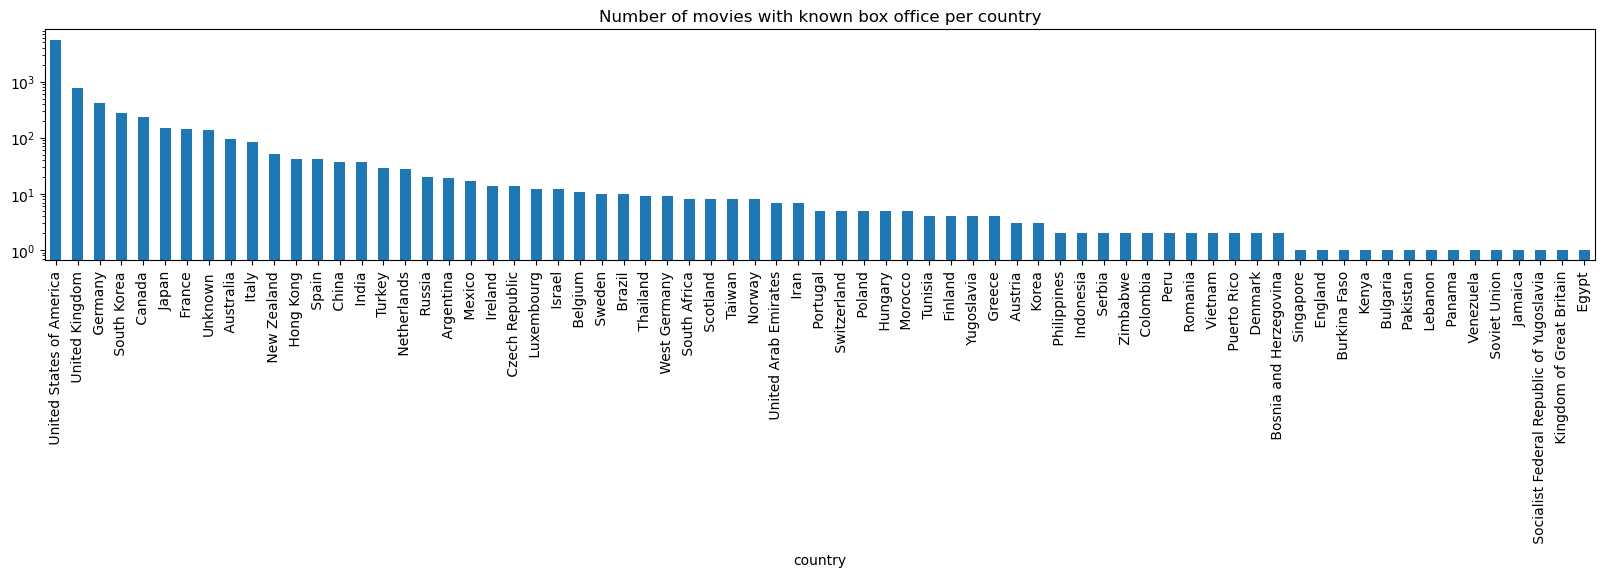

In [244]:
movies.dropna(subset=["movie_box_office_revenue"])["country"].value_counts().plot(kind="bar", figsize=(20, 3), rot=90)
plt.yscale("log")
plt.title("Number of movies with known box office per country")

In [245]:
movies.dropna(subset=["movie_box_office_revenue"])[movies["country"] == "Unknown"]

/var/folders/sv/w7ktc7zj5z599_rcq8wsnttw0000gn/T/ipykernel_70175/2230540110.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies.dropna(subset=["movie_box_office_revenue"])[movies["country"] == "Unknown"]


,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year,country
1047,34055313,/m/0hr2hsx,American Adobo,NaN,344992.0,104.0,{},{},"{""/m/06cvj"": ""Romantic comedy"", ""/m/02l7c8"": ""...",NaN,Unknown
1888,25496318,/m/09rtnc_,Wog Boy 2: Kings of Mykonos,NaN,14370197.0,102.0,{},{},"{""/m/05p553"": ""Comedy film""}",NaN,Unknown
2221,32424995,/m/0gys3jx,Haunted,1991-02-16,6700000.0,85.0,{},{},"{""/m/05p553"": ""Comedy film"", ""/m/03npn"": ""Horr...",1991,Unknown
2783,29890894,/m/0fqsr2z,The First Texan,1956,1000000.0,82.0,{},{},"{""/m/03btsm8"": ""Action/Adventure"", ""/m/0hfjk"":...",1956,Unknown
3424,29034714,/m/0dgp3r7,The Kid from Spain,1932-11-17,2621000.0,96.0,"{""/m/02h40lc"": ""English Language""}",{},"{""/m/05p553"": ""Comedy film"", ""/m/02l7c8"": ""Rom...",1932,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
79278,33934476,/m/0hnd87k,Housecoat 3,NaN,14034050.0,79.0,{},{},"{""/m/06cvj"": ""Romantic comedy""}",NaN,Unknown
79413,9170459,/m/027_1c4,Keroro Gunso the Super Movie 2: Sinkai no Prin...,NaN,3877862.0,NaN,"{""/m/03_9r"": ""Japanese Language""}",{},"{""/m/0hcr"": ""Animation""}",NaN,Unknown
80419,25394470,/m/09g6j10,Pokémon: Zoroark: Master of Illusions,2010-07-10,47204602.0,95.0,"{""/m/03_9r"": ""Japanese Language"", ""/m/02h40lc""...",{},"{""/m/03btsm8"": ""Action/Adventure"", ""/m/01jfsb""...",2010,Unknown
80654,32700752,/m/0h3wv2q,The Plane Tree,2011-03-18,1562977.0,121.0,{},{},"{""/m/07s9rl0"": ""Drama"", ""/m/01z4y"": ""Comedy""}",2011,Unknown


In [240]:
columns_movies = [
    "wikipedia_movie_ID",
    "freebase_movie_ID",
    "movie_name",
    "movie_release_date",
    "movie_box_office_revenue",
    "movie_runtime",
    "movie_languages",
    "movie_countries",
    "movie_genres",
]

DATA_PATH = "/Users/mikolajboronski/Documents/EPFL/AppliedDataAnalysis/project1/MovieSummaries/"
MOVIE_PATH = DATA_PATH + "movie.metadata.tsv"

movies = pd.read_csv(MOVIE_PATH, sep="\t", names=columns_movies, header=None)
movies["year"] = movies["movie_release_date"].str[:4]

movies.head()

,wikipedia_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_office_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983


KeyError: 'Burkina Faso'

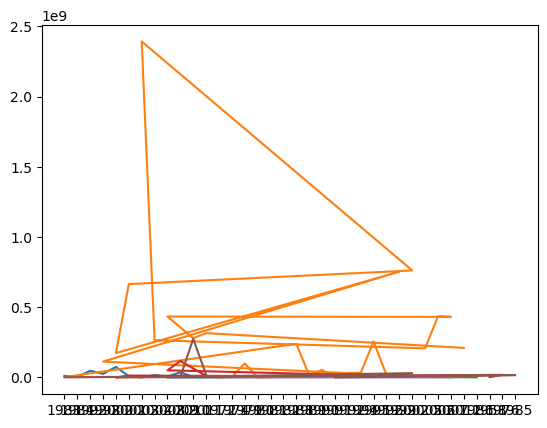

In [251]:
movies['country'] = movies['country'].str.strip()

t = movies.dropna(subset=["movie_box_office_revenue"]).groupby(["country", "year"])[["movie_box_office_revenue"]].sum()

for country in t.index.levels[0]:
    if country.lower() == "unknown":
        continue
    country_data = t.loc[(country, slice(None)), :]
    plt.plot(t.loc[country])